In [1]:
import gensim.downloader as api
# model trained on google news
wv = api.load("word2vec-google-news-300")

In [2]:
wv.similarity("good","bad")

0.7190051

In [3]:
wv.similarity("profit","loss")

0.34199455

In [4]:
wv.most_similar("profit")

[('profits', 0.802002489566803),
 ('proft', 0.7426661252975464),
 ('pretax_profit', 0.6691470742225647),
 ('pretax_profits', 0.643925130367279),
 ('Profit', 0.6339423060417175),
 ('earnings', 0.6314975023269653),
 ('Profits', 0.5853961706161499),
 ('revenue', 0.5829346179962158),
 ('pretax', 0.5686764717102051),
 ('quarterly', 0.5639331936836243)]

In [5]:
wv.most_similar("loss")

[('losses', 0.7114115357398987),
 ('losing', 0.5708735585212708),
 ('Loss', 0.5704946517944336),
 ('lost', 0.5399519801139832),
 ('setback', 0.5351796746253967),
 ('defeat', 0.5325874090194702),
 ('losss', 0.4918319880962372),
 ('Losses', 0.4891048073768616),
 ('drubbing', 0.4826142489910126),
 ('lossof', 0.4781074821949005)]

In [6]:
# france - paris +berlin = germany
wv.most_similar(positive=["france","berlin"],negative=["paris"])
wv.most_similar(positive=["king","woman"],negative=["man"])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [7]:
# gives me the word which doesn't match with others
wv.doesnt_match(["facebook","google","cat","microsoft"])

'cat'

In [8]:
# GloVe - Global Vector
glv = api.load("glove-twitter-25")

In [9]:
glv.most_similar("apple")

[('windows', 0.8948712944984436),
 ('microsoft', 0.8858076333999634),
 ('google', 0.8823867440223694),
 ('galaxy', 0.8806391358375549),
 ('flash', 0.8793812394142151),
 ('android', 0.8782057762145996),
 ('nokia', 0.8770236372947693),
 ('samsung', 0.8697316646575928),
 ('chrome', 0.8691699504852295),
 ('ipad', 0.8670315742492676)]

In [10]:
glv.doesnt_match("banana grapes cat mango".split(" "))

'cat'

### Fake news detection using gensim lib

In [11]:
# getting vector 
wv_good = wv["good"]
wv_good

array([ 0.04052734,  0.0625    , -0.01745605,  0.07861328,  0.03271484,
       -0.01263428,  0.00964355,  0.12353516, -0.02148438,  0.15234375,
       -0.05834961, -0.10644531,  0.02124023,  0.13574219, -0.13183594,
        0.17675781,  0.27148438,  0.13769531, -0.17382812, -0.14160156,
       -0.03076172,  0.19628906, -0.03295898,  0.125     ,  0.25390625,
        0.12695312, -0.15234375,  0.03198242,  0.01135254, -0.01361084,
       -0.12890625,  0.01019287,  0.23925781, -0.08447266,  0.140625  ,
        0.13085938, -0.04516602,  0.06494141,  0.02539062,  0.05615234,
        0.24609375, -0.20507812,  0.23632812, -0.00860596, -0.02294922,
        0.05078125,  0.10644531, -0.03564453,  0.08740234, -0.05712891,
        0.08496094,  0.23535156, -0.10107422, -0.03564453, -0.04736328,
        0.04736328, -0.14550781, -0.10986328,  0.14746094, -0.23242188,
       -0.07275391,  0.19628906, -0.37890625, -0.07226562,  0.04833984,
        0.11914062,  0.06103516, -0.12109375, -0.27929688,  0.05

In [12]:
import pandas as pd

df = pd.read_csv("fake new detection\\true_fake.csv")
df.head()

,title,text,subject,date,is_fake,text_vector
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,[-1.6387042 -0.0278375 -1.6619873 -0.201702...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,[-1.95583546e+00 5.58723688e-01 -2.03644609e+...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,[-1.9058484 -0.04223674 -1.7389339 -0.028550...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,[-1.62652135e+00 1.46197051e-01 -5.87798119e-...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,[-2.13273764e+00 1.10176146e+00 -2.47958469e+...


In [13]:
df.is_fake.value_counts()

1    23481
0    21417
Name: is_fake, dtype: int64

In [14]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [17]:
def preprocess_and_vectorize(text):
    doc = nlp(text)
    #preprocessing
    preprocessed=[]
    for token in doc:
        if(not token.is_stop or not token.is_punct):
            preprocessed.append(token.lemma_)

    #getting vector of each word then average them to get sentence vector
    sentence_vector = wv.get_mean_vector(preprocessed)
    return sentence_vector

preprocess_and_vectorize("Don't worry if you don't understand").shape

(300,)

In [18]:
df["text_gensim_vector"] = df["text"].apply(lambda x: preprocess_and_vectorize(x))

In [19]:
df.head()

,title,text,subject,date,is_fake,text_vector,text_gensim_vector
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,[-1.6387042 -0.0278375 -1.6619873 -0.201702...,"[0.01540294, 0.018468648, 0.008830003, 0.03844..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,[-1.95583546e+00 5.58723688e-01 -2.03644609e+...,"[0.004252143, 0.013153361, 0.010278974, 0.0237..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,[-1.9058484 -0.04223674 -1.7389339 -0.028550...,"[0.013383197, 0.012675753, 0.0114827575, 0.034..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,[-1.62652135e+00 1.46197051e-01 -5.87798119e-...,"[0.011662375, 0.014186432, 0.015125484, 0.0379..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,[-2.13273764e+00 1.10176146e+00 -2.47958469e+...,"[0.019030558, 0.018852388, 0.01944257, 0.04305..."


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["text_gensim_vector"],df["is_fake"],random_state=2022,test_size=0.2,stratify=df["is_fake"])

In [21]:
print(f"x_train before reshaping {x_train.shape}")

x_train_2d = np.stack(x_train)
x_test_2d= np.stack(x_test)

print(f"x_train after reshaping {x_train_2d.shape}")

x_train before reshaping (35918,)
x_train after reshaping (35918, 300)


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier()
clf.fit(x_train_2d,y_train)

y_pred = clf.predict(x_test_2d)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4284
           1       0.96      0.95      0.96      4696

    accuracy                           0.96      8980
   macro avg       0.95      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



Text(95.72222222222221, 0.5, 'Truth')

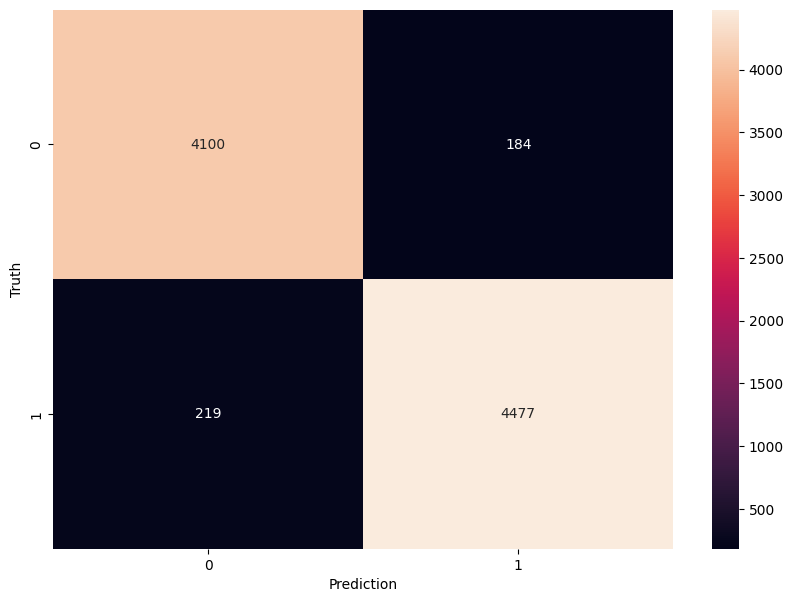

In [23]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn
cm = confusion_matrix(y_true = y_test,y_pred=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")